Customer Segmentation and Decision Making with Machine Learning

## Load data

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [6]:
# Load dataset
df_data = pd.read_csv("C:\\Business Intelligence - Digital Skola\\Tugas\\machine learning\\Customer Segmentation and Decision Making with Machine Learning\\transactions.csv")

## Cek data

In [7]:
df_data.info()
df_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False


In [8]:
df_data.shape

(641914, 23)

##Analisis deskriptif

In [9]:
df_data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,638569.000000,641627.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,5.547701e+08,10697.210608,6652.828573,135.162497,9.136460,3.238367,557.199927,556.775160,4886.184043,4044.382035
std,2.546884e+08,2.546884e+08,11460.359133,9227.132275,147.053302,16.961185,9.680862,257.326204,257.402639,2859.053679,5945.510224
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,2.000000,1.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,2.000000,1.000000,334.000000,333.000000,2364.000000,502.442500
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,5.000000,1.000000,581.000000,580.000000,4873.000000,2151.860000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,9.000000,1.000000,762.000000,761.000000,7267.000000,5005.890000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,90.000000,99.000000,998.000000,998.000000,9998.000000,47496.500000


In [10]:
df_data.describe(include='object')

,transactionDateTime,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType
count,641914,641914,638001,641290,641914,641914,641914,641914,641325
unique,635472,2493,4,4,19,165,1826,2186,3
top,2016-11-01T09:09:27,Lyft,US,US,online_retail,1/5/2026,11/12/2015,20/7/2016,PURCHASE
freq,3,25311,632303,635577,161469,4209,10137,3948,608685


In [11]:
df_data['merchantCountryCode'].unique()

array(['US', 'PR', 'MEX', nan, 'CAN'], dtype=object)

In [12]:
df_data.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                float64
posConditionCode            float64
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
isFraud                        bool
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
dtype: object

# Explorasi Data

## 1. Uvariate Anlaysis

In [13]:
sns.set_color_codes("pastel")
sns.set_style("whitegrid")

### transactionAmount

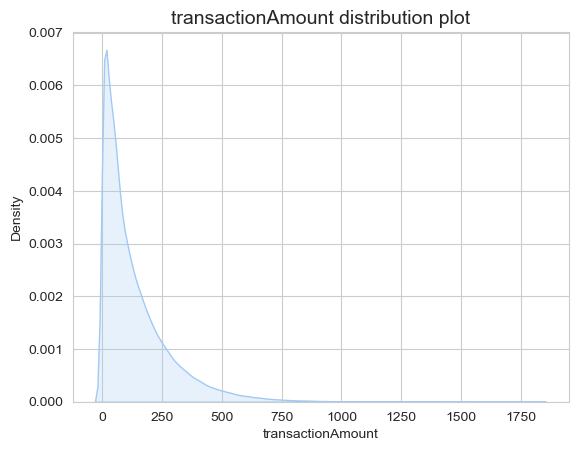

In [14]:
sns.kdeplot(data=df_data, x='transactionAmount', fill=True, color='b')
plt.title('transactionAmount distribution plot', fontsize=14)
plt.xlabel("transactionAmount")
plt.ylabel("Density")
plt.show()

Key takeaway:
1. Sebagian besar konsumen dengan transactionAmount $0 - $250
2. distribusi miring ke kanan, lebih banyak customer yang transation amount rendah
3. customer menurun setelah transation amount 250

### merchant category

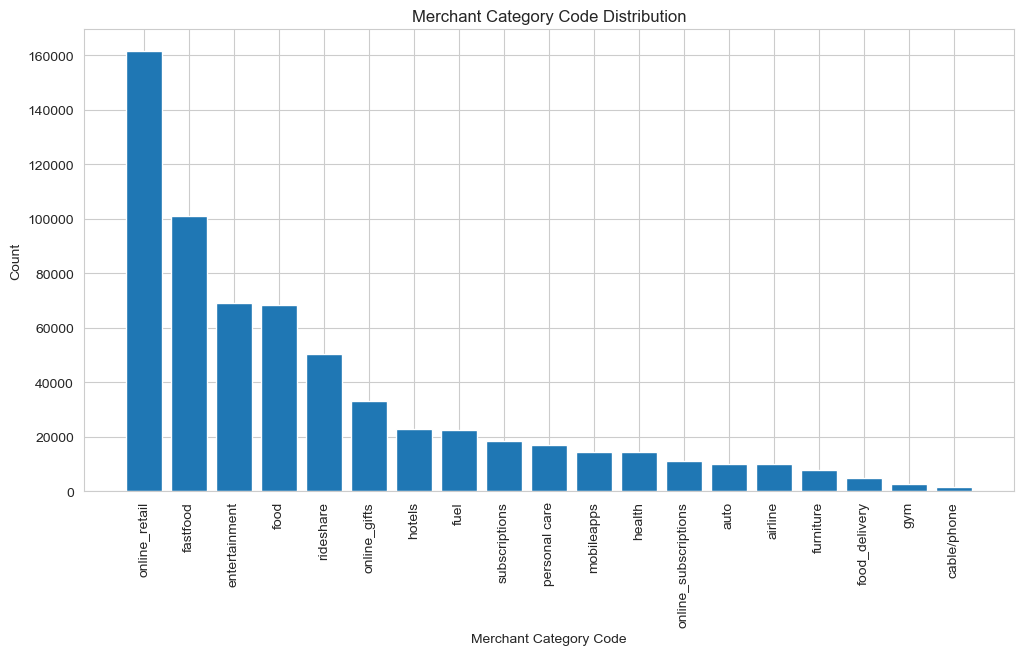

In [15]:
category_counts = df_data['merchantCategoryCode'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=90)
plt.title('Merchant Category Code Distribution')
plt.xlabel('Merchant Category Code')
plt.ylabel('Count')
plt.show()

key insight :
1. Jumlah merchant category tertinggi adalah online retail
2. Jumlah merchant category terendah adalah cable/phone

### Merchant Country Code

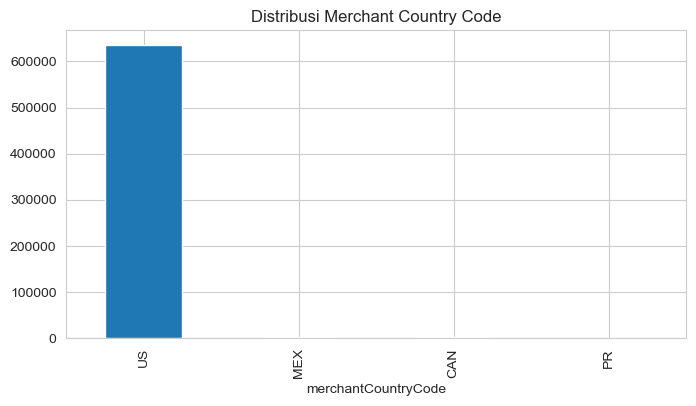

In [16]:
plt.figure(figsize=(8,4))
df_data["merchantCountryCode"].value_counts().plot(kind="bar")
plt.title("Distribusi Merchant Country Code")
plt.show()

Key takeway:
1. Konsumen didominasi oleh country  US

### Available money

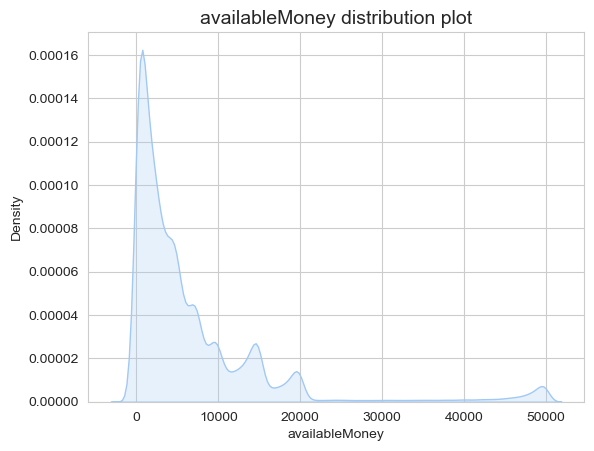

In [17]:
sns.kdeplot(data=df_data, x='availableMoney', fill=True, color='b')
plt.title('availableMoney distribution plot', fontsize=14)
plt.show()

### Curent Balance

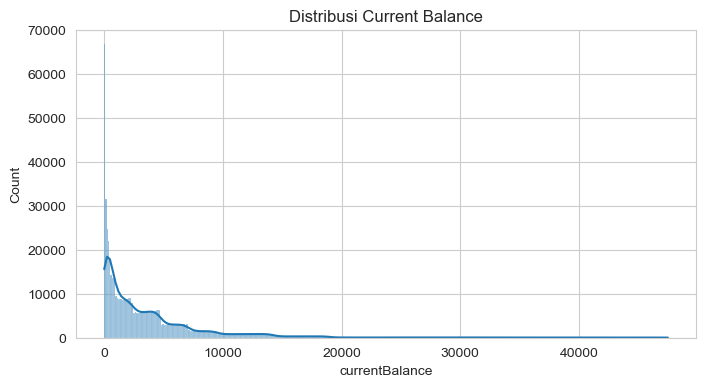

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(df_data["currentBalance"], kde=True)
plt.title("Distribusi Current Balance")
plt.show()

### CreditLLimmit

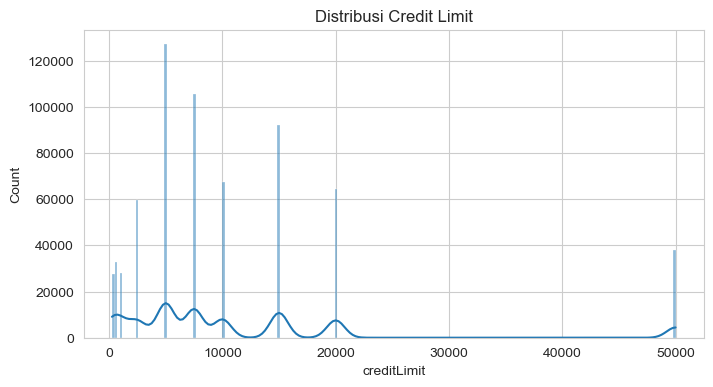

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df_data["creditLimit"], kde=True)
plt.title("Distribusi Credit Limit")
plt.show()


### trasactionType

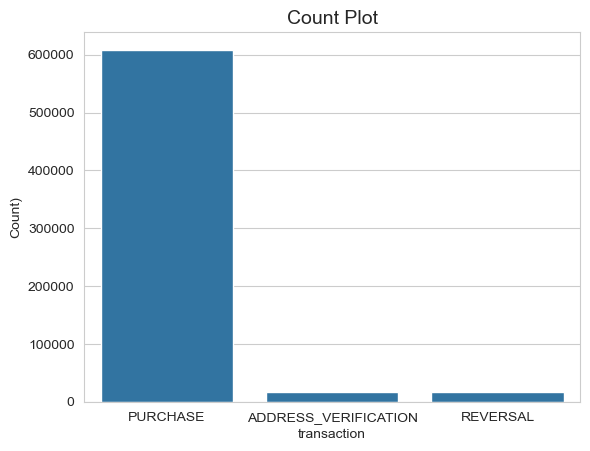

In [20]:
sns.countplot(x=df_data["transactionType"])
plt.title("Count Plot", fontsize="14")
plt.xlabel("transaction")
plt.ylabel("Count)")
plt.show()

### Merchant Name

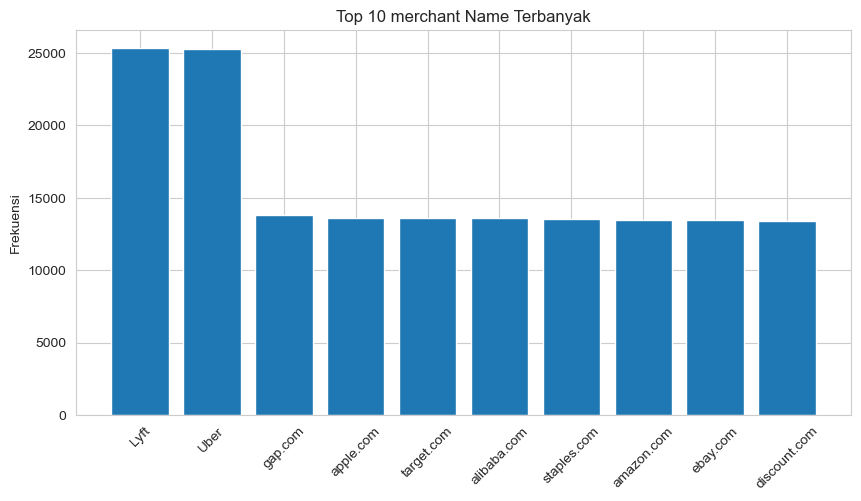

In [21]:
import matplotlib.pyplot as plt

top10 = df_data['merchantName'].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 merchant Name Terbanyak")
plt.ylabel("Frekuensi")
plt.show()


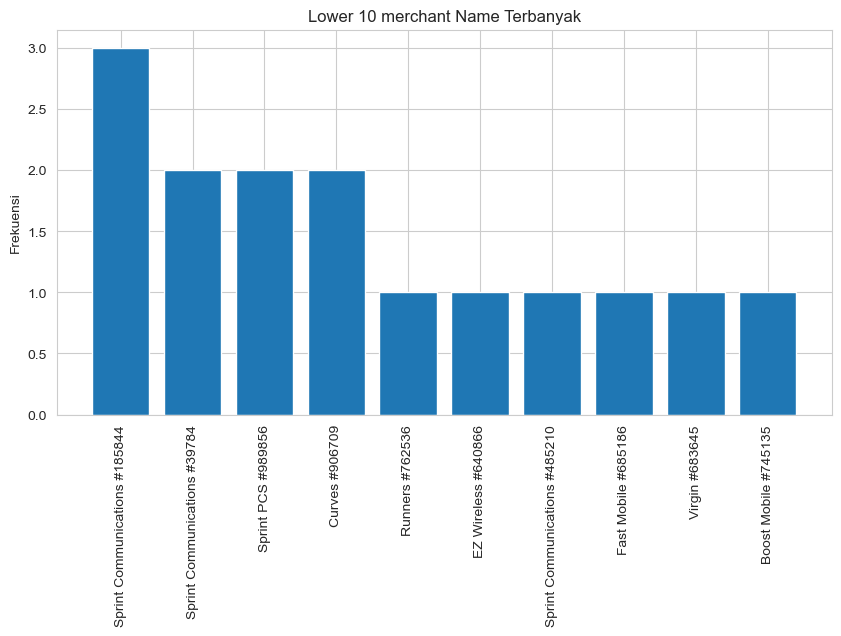

In [22]:
lower10 = df_data['merchantName'].value_counts().tail(10)

plt.figure(figsize=(10,5))
plt.bar(lower10.index, lower10.values)
plt.xticks(rotation=90)
plt.title("Lower 10 merchant Name Terbanyak")
plt.ylabel("Frekuensi")
plt.show()


## 2. Bivariate

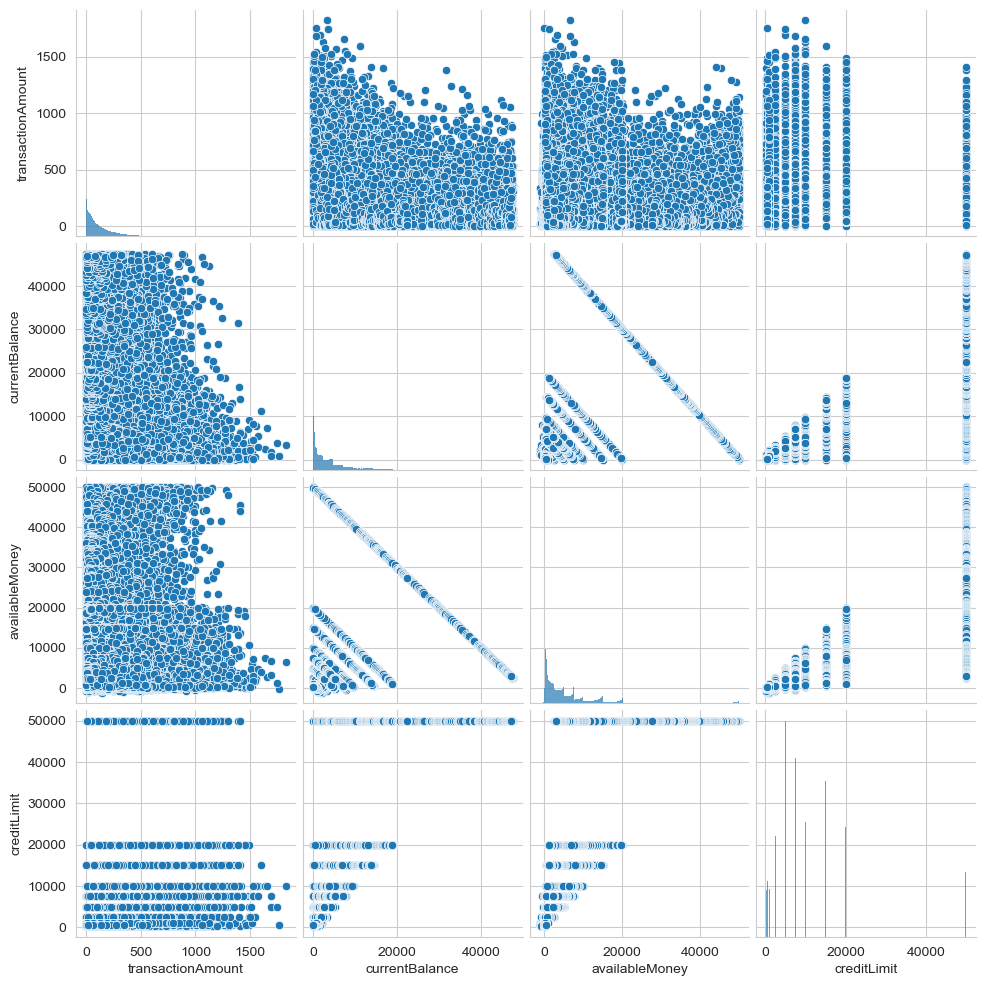

In [25]:
numeric_cols = ["transactionAmount", "currentBalance", "availableMoney", "creditLimit"]

sns.pairplot(df_data[numeric_cols])
plt.show()

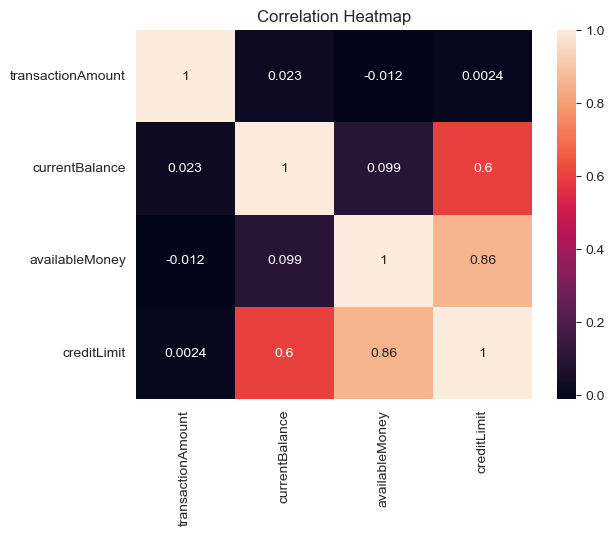

In [26]:
numeric_cols = ["transactionAmount", "currentBalance", "availableMoney", "creditLimit"]

sns.heatmap(df_data[numeric_cols].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

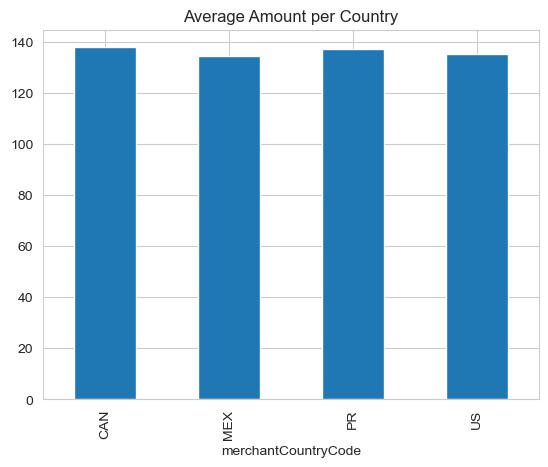

In [27]:
df_test = df_data.groupby("merchantCountryCode")["transactionAmount"].mean().plot(kind="bar")
plt.title("Average Amount per Country")
plt.show()


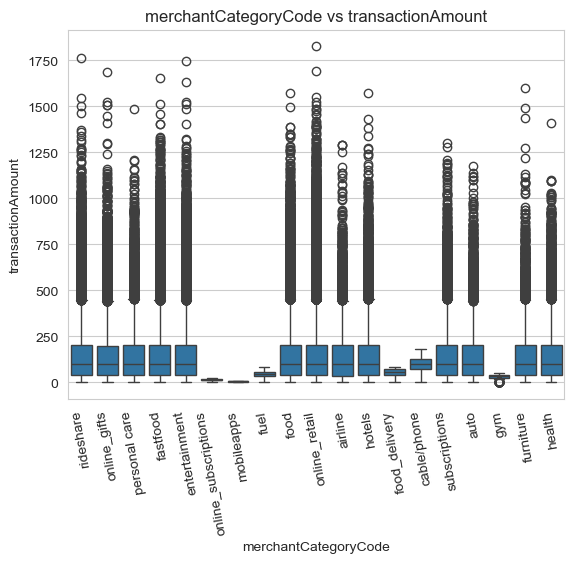

In [28]:
sns.boxplot(x="merchantCategoryCode", y="transactionAmount", data=df_data)
plt.title("merchantCategoryCode vs transactionAmount")
plt.xticks(rotation=100)
plt.show()


## 3. Multivariate

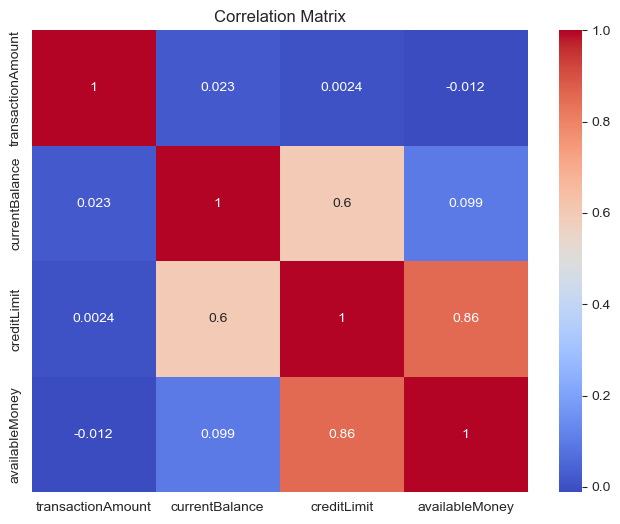

In [29]:
numeric_cols = ["transactionAmount", "currentBalance", "creditLimit", "availableMoney"]

plt.figure(figsize=(8,6))
sns.heatmap(df_data[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


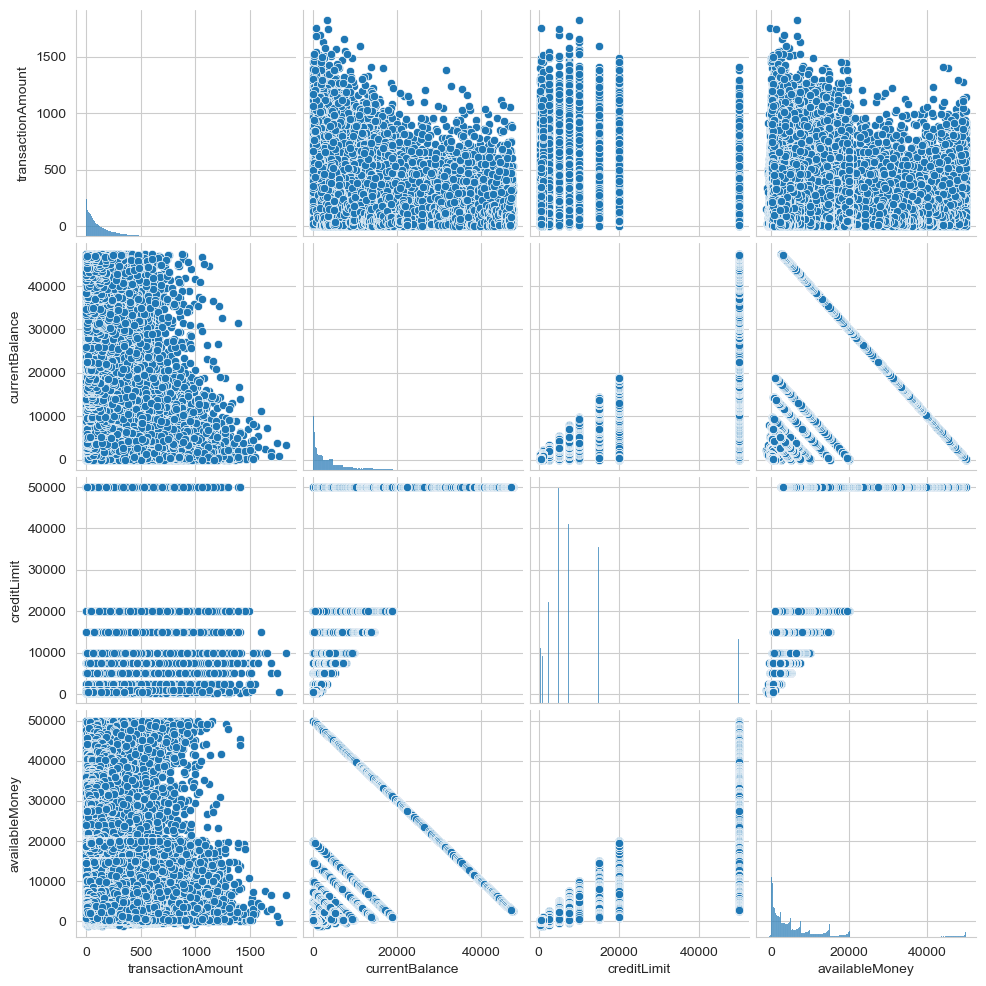

In [30]:
sns.pairplot(df_data[numeric_cols])
plt.show()

# Data Transformation

## 1. Ambil variabel penting

In [31]:
important_cols = [
   'transactionAmount',
    'merchantCountryCode',
    'availableMoney',
    'currentBalance',
    'creditLimit',
]

df_clean = df_data[important_cols].copy()

## 2. handling Missing Value

In [32]:
df_clean.isnull().sum()

transactionAmount        0
merchantCountryCode    624
availableMoney           0
currentBalance           0
creditLimit              0
dtype: int64

In [33]:
df_clean.dtypes

transactionAmount      float64
merchantCountryCode     object
availableMoney         float64
currentBalance         float64
creditLimit              int64
dtype: object

In [34]:
# Numerical
num_cols = ['transactionAmount', 'availableMoney', 'currentBalance', 'creditLimit']

# Categorical
cat_cols = ['merchantCountryCode']
for col in cat_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

C:\Users\Rian\AppData\Local\Temp\ipykernel_32756\1479448840.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


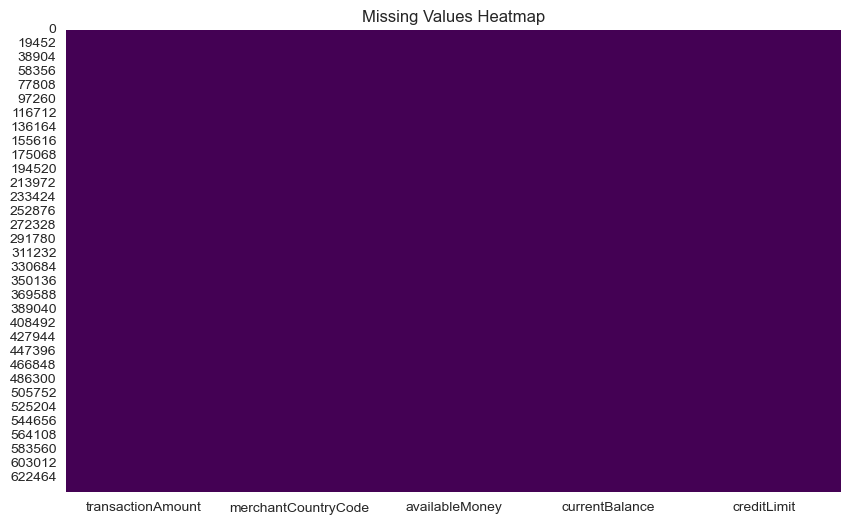

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## 3. Handling Outlier

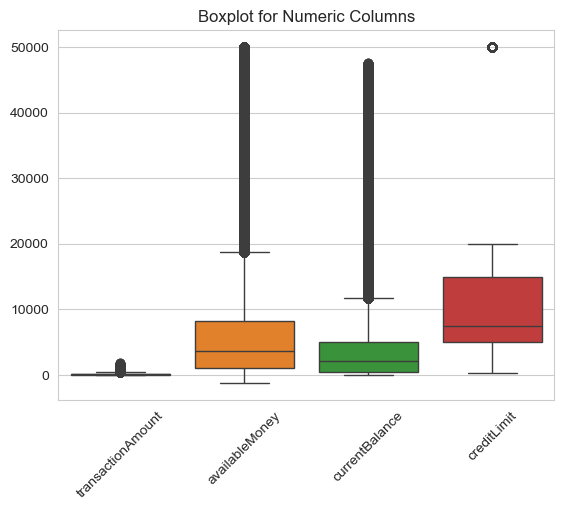

In [36]:
sns.boxplot(data=df_clean)
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns")
plt.show()

In [37]:
df_clean.describe()

,transactionAmount,availableMoney,currentBalance,creditLimit
count,641914.000000,641914.000000,641914.000000,641914.000000
mean,135.162497,6652.828573,4044.382035,10697.210608
std,147.053302,9227.132275,5945.510224,11460.359133
min,0.000000,-1244.930000,0.000000,250.000000
25%,32.320000,1114.970000,502.442500,5000.000000
50%,85.800000,3578.165000,2151.860000,7500.000000
75%,189.030000,8169.185000,5005.890000,15000.000000
max,1825.250000,50000.000000,47496.500000,50000.000000


In [38]:
q1_availableMoney = 1115
q2_availableMoney = 3578
q3_availableMoney = 8169

q1_transactionAmount = 32
q2_transactionAmount = 86
q3_transactionAmount = 189

q1_currentBalance = 502
q2_currentBalance = 2152
q3_currentBalance = 5006

q1_creditLimit = 5000
q2_creditLimit = 7500
q3_creditLimit = 15000

In [39]:
iqr_availableMoney = q3_availableMoney - q1_availableMoney
iqr_transactionAmount = q3_transactionAmount - q1_transactionAmount
iqr_currentBalance = q3_currentBalance - q1_currentBalance
iqr_creditLimit = q3_creditLimit - q1_creditLimit

In [40]:
lower_bound_availableMoney = q3_availableMoney - (1.5 * iqr_availableMoney)
upper_bound_availableMoney = q3_availableMoney + (1.5 * iqr_availableMoney)

lower_bound_transactionAmount = q3_transactionAmount - (1.5 * iqr_transactionAmount)
upper_bound_transactionAmount = q3_transactionAmount + (1.5 * iqr_transactionAmount)

lower_bound_currentBalance = q3_currentBalance - (1.5 * iqr_currentBalance)
upper_bound_currentBalance = q3_currentBalance + (1.5 * iqr_currentBalance)

lower_bound_creditLimit = q3_creditLimit - (1.5 * iqr_creditLimit)
upper_bound_creditLimit = q3_creditLimit + (1.5 * iqr_creditLimit)

print('lower bound availableMoney:', lower_bound_availableMoney)
print('upper bound availableMoney:', upper_bound_availableMoney)
print('lower bound transactionAmount:', lower_bound_transactionAmount)
print('upper bound transactionAmount:', upper_bound_transactionAmount)
print('lower bound currentBalance:', lower_bound_currentBalance)
print('upper bound currentBalance:', upper_bound_currentBalance)
print('lower bound creditLimit:', lower_bound_creditLimit)
print('upper bound creditLimit:', upper_bound_creditLimit)

lower bound availableMoney: -2412.0
upper bound availableMoney: 18750.0
lower bound transactionAmount: -46.5
upper bound transactionAmount: 424.5
lower bound currentBalance: -1750.0
upper bound currentBalance: 11762.0
lower bound creditLimit: 0.0
upper bound creditLimit: 30000.0


In [41]:
def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower, upper)
    return df

df_capped = cap_outliers(df_clean.copy(), numeric_cols)  # dataframe baru


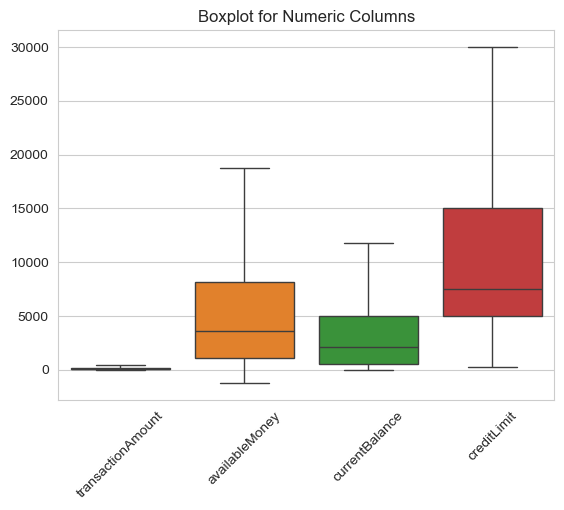

In [42]:
sns.boxplot(data=df_capped)
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns")
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_capped[numeric_cols])

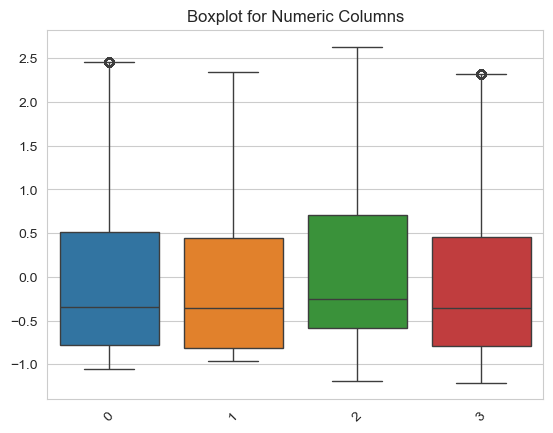

In [44]:
sns.boxplot(data=X_scaled)
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns")
plt.show()

# Data Prepocessing

In [45]:
df_capped

,transactionAmount,merchantCountryCode,availableMoney,currentBalance,creditLimit
0,111.33,US,5000.00,0.00,5000
1,24.75,US,4888.67,111.33,5000
2,187.40,US,4863.92,136.08,5000
3,227.34,US,4676.52,323.48,5000
4,0.00,US,4449.18,550.82,5000
...,...,...,...,...,...
641909,5.37,US,2574.02,4925.98,7500
641910,223.70,US,2568.65,4931.35,7500
641911,138.42,US,2344.95,5155.05,7500
641912,16.31,US,2206.53,5293.47,7500


In [46]:
df_ohe = pd.get_dummies(df_capped, columns=['merchantCountryCode'], prefix='country')

In [47]:
df_ohe.head()

,transactionAmount,availableMoney,currentBalance,creditLimit,country_CAN,country_MEX,country_PR,country_US
0,111.33,5000.00,0.00,5000,False,False,False,True
1,24.75,4888.67,111.33,5000,False,False,False,True
2,187.40,4863.92,136.08,5000,False,False,False,True
3,227.34,4676.52,323.48,5000,False,False,False,True
4,0.00,4449.18,550.82,5000,False,False,False,True


# Clustering

In [48]:
df_ohe.describe()

,transactionAmount,availableMoney,currentBalance,creditLimit
count,641914.000000,641914.000000,641914.000000,641914.000000
mean,127.272291,5612.716988,3416.774897,9512.036270
std,121.011254,5671.681338,3565.206161,7776.712339
min,0.000000,-1244.930000,0.000000,250.000000
25%,32.320000,1114.970000,502.442500,5000.000000
50%,85.800000,3578.165000,2151.860000,7500.000000
75%,189.030000,8169.185000,5005.890000,15000.000000
max,424.095000,18750.507500,11761.061250,30000.000000


### elbow method

In [49]:
inertia_values = []
k_ranges = range(1, 11)

for k in k_ranges:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(df_ohe)
  inertia_values.append(kmeans.inertia_)

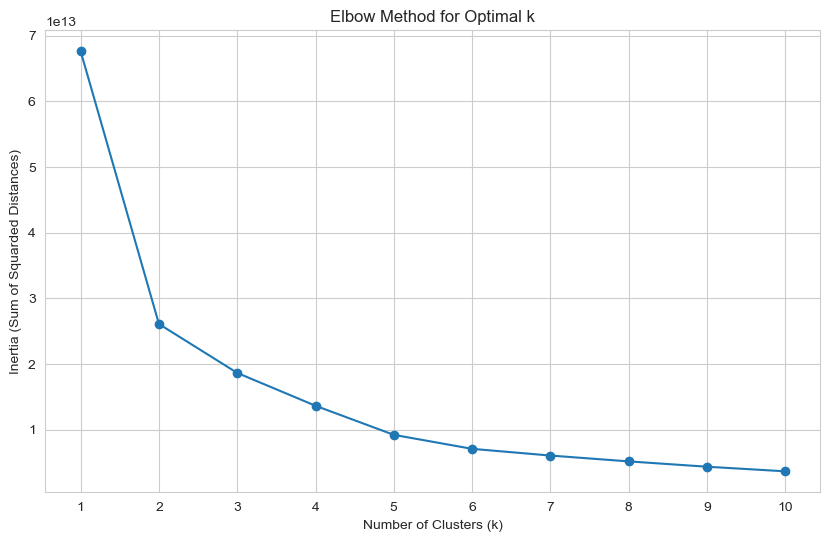

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(k_ranges, inertia_values, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squarded Distances)')
plt.xticks(k_ranges)
plt.grid(True)
plt.show()

### Clustering

In [97]:
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans_label = kmeans.fit_predict(df_ohe)

In [98]:
df_ohe["cluster"] = kmeans_label

In [99]:
kmeans_label

array([0, 0, 0, ..., 0, 0, 0], shape=(641914,), dtype=int32)

In [100]:
pd.Series(kmeans_label).value_counts()

0    447632
1    194282
Name: count, dtype: int64

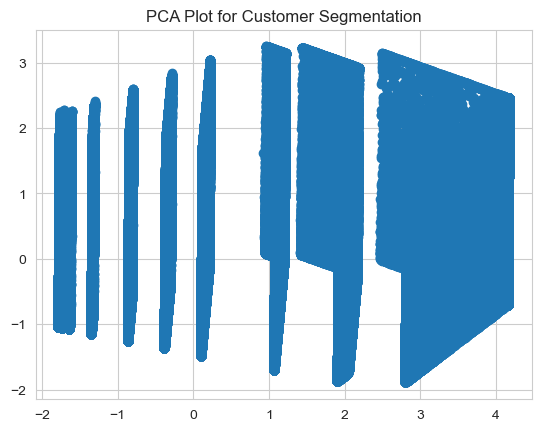

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ohe[numeric_cols])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.scatter(pca_result[:,0], pca_result[:,1])
plt.title("PCA Plot for Customer Segmentation")
plt.show()

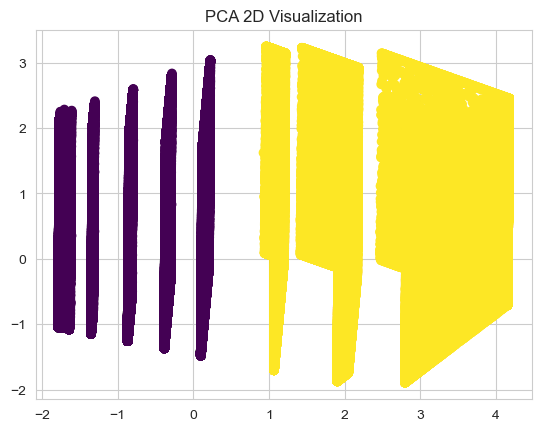

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X_scaled)

plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=kmeans_label, cmap='viridis')
plt.title("PCA 2D Visualization")
plt.show()

### Dimentionality Reduction

In [104]:
df_analysis = df_ohe.groupby("cluster").mean()
df_analysis

,transactionAmount,availableMoney,currentBalance,creditLimit,country_CAN,country_MEX,country_PR,country_US
cluster,,,,,,,,
0,127.205951,2834.833182,2302.331386,5137.164568,0.002913,0.004157,0.001939,0.990990
1,127.425141,12013.050955,5984.488724,19591.881904,0.002934,0.003989,0.001724,0.991353


Cluster Insight :        
1. cluster 0 = Transaksi sedang, saldo rendah, limit rendah, banyak transaksi di US
2. cluster 2 = Transaksi besar, saldo sangat tinggi, banyak transaksi di US

Visualisasi hasil clustering dapat menggunakan metode TSNE untuk visualisasi yang lebih bagus (karena dataset besar metode ini akan memakan waktu yang cukup lama)

In [58]:
# tsne = TSNE(n_components=2, random_state=42, perplexity=20)
# # X_2d = tsne.fit_transform(df_ohe)

In [59]:
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_label, cmap="viridis")
# plt.title("Clusters with t-SNE")
# plt.xlabel("Component 1")
# plt.ylabel("Component 2")
# plt.legend(*scatter.legend_elements(), title="Cluster")
# plt.grid(True)
# plt.show()